# 과제1. car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 0.환경설정

* 필요한 라이브러리 로딩, 데이터셋 가져오기

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst                              # 가설검정 도구 가져오기

### 2) 데이터 불러오기

In [168]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Urban', 'Education'],axis = 1, inplace = True)
data.head()

# data = pd.read_csv('carseats.csv')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,73,11,276,120,Bad,42,Yes
1,11.22,111,48,16,260,83,Good,65,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes
4,4.15,141,64,3,340,128,Bad,38,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|   CompPrice   |   각 지역 경쟁사 가격   |   feature   |
|   Income   |   각 지역 평균 소득수준(단위 : 1000달러)   |   feature   |
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(Good, Medium, Bad)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes, No)	|	feature	|


In [187]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,73,11,276,120,Bad,42,Yes
1,11.22,111,48,16,260,83,Good,65,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes
4,4.15,141,64,3,340,128,Bad,38,No


## 1.가설수립

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) Sales

In [18]:
cars = data
cars

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes
3,7.40,4,466,97,Medium,55,Yes
4,4.15,3,340,128,Bad,38,No
...,...,...,...,...,...,...,...
395,12.57,17,203,128,Good,33,Yes
396,6.14,3,37,120,Medium,55,Yes
397,7.41,12,368,159,Medium,40,Yes
398,5.94,7,284,95,Bad,50,Yes


1) 변수의 비즈니스 의미

지역별 카시트 판매 내역

2) 숫자, 범주?

In [189]:
print(data.isna().sum())

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
US             0
dtype: int64


In [127]:
cars['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

숫자

    Sales, Advertising, Population, Price, Age

범주

    ShelveLoc, US

3) NaN 존재 유무

In [138]:
cars.isna().sum()

Sales          0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
US             0
dtype: int64

- 결측치 존재 X

4) 기초통계량(수치화)

In [139]:
cars['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

5) 분포 확인(시각화)

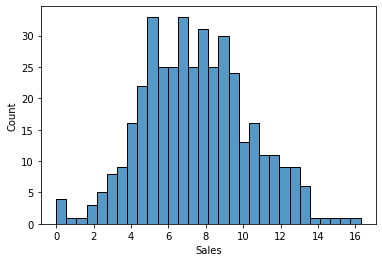

In [156]:
sns.histplot(cars['Sales'], bins=30)
plt.show()

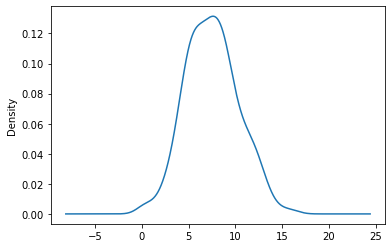

In [141]:
cars['Sales'].plot(kind='kde')
plt.show()

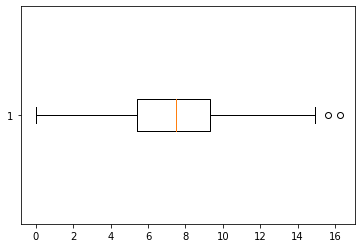

In [152]:
box = plt.boxplot(cars['Sales'], vert=False)
plt.show()

l_fence = box['whiskers'][0].get_ydata()[1]
u_fence = box['whiskers'][1].get_ydata()[1]
# print(box['whiskers'][0].get_ydata())    # 아래쪽 수염의 max, min
# print(box['whiskers'][1].get_ydata())    # 위쪽 수염의 min, max

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> boxplot 기준으로 볼 때, 약 15% 이상은 이상치로 볼 수 있다

7) 추가 분석해 볼 사항이 있나요?

> 박스플롯으로 볼 때 이상치가 생기는 지역의 판매율의 이유를 분석해 볼 필요가 있다

### 2) Advertising

In [143]:
cars['Advertising'].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

In [144]:
cars['Advertising']

0      11
1      16
2      10
3       4
4       3
       ..
395    17
396     3
397    12
398     7
399     0
Name: Advertising, Length: 400, dtype: int64

1) 변수의 비즈니스 의미

> 각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [145]:
cars['Advertising'].isna().sum()

0

> 결측치가 존재하지 않음

4) 기초통계량(수치화)

In [147]:
cars['Advertising'].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

5) 분포 확인(시각화)

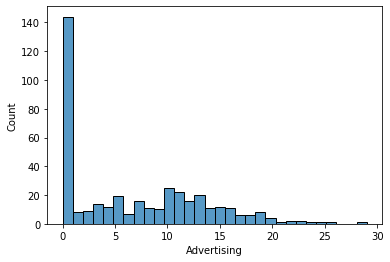

In [157]:
sns.histplot(cars['Advertising'], bins=30)
plt.show()

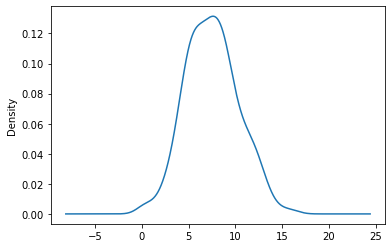

In [149]:
cars['Sales'].plot(kind='kde')
plt.show()

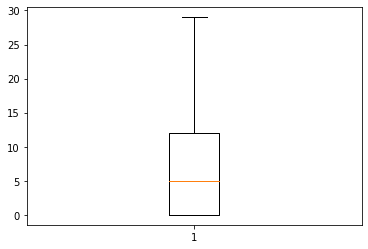

In [150]:
box = plt.boxplot(cars['Advertising'])
plt.show()

In [151]:
cars['Advertising'].value_counts()

0     144
10     25
11     22
13     20
5      19
7      16
12     16
3      14
4      12
15     12
16     11
14     11
8      11
9      10
2       9
1       8
19      8
6       7
17      6
18      6
20      4
22      2
23      2
21      1
24      1
25      1
26      1
29      1
Name: Advertising, dtype: int64

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 지역 중 약 37%의 지역이 회사의 광고예산이 없다는 것을 알 수 있다.
    * 평균적으로 약 6600달러정도의 광고예산이 들어가는 것을 알 수 있다.

7) 추가 분석해 볼 사항이 있나요?

> * max값인 29수치의 지역의 판매량을 분석 할 필요가 있어 보인다
> * 광고예산이 들어가지 않은 지역의 판매량을 분석할 필요가 있어 보인다

### 3) Population

In [40]:
cars['Population'].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

1) 변수의 비즈니스 의미

* 지역 인구수(단위 : 1000명)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무

In [42]:
cars['Population'].isna().sum()

0

* 결측치는 없다

4) 기초통계량(수치화)

In [43]:
cars['Population'].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

5) 분포 확인(시각화)

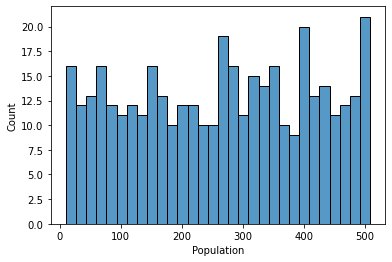

In [158]:
sns.histplot(data=cars, x='Population', bins=30)
plt.show()

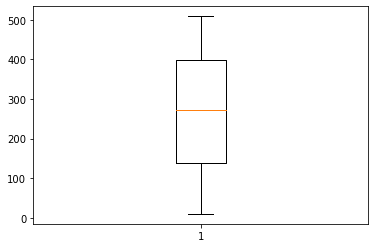

In [52]:
box = plt.boxplot(cars['Population'])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 

7) 추가 분석해 볼 사항이 있나요?

> * 

### 4) Price

In [159]:
cars['Price'].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

1) 변수의 비즈니스 의미

* 자사 지역별 판매가격(달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무

In [64]:
cars['Price'].isna().sum()

0

* 결측치 없음

4) 기초통계량(수치화)

In [65]:
cars['Price'].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

In [69]:
cars['Price'].value_counts()

128    12
120    12
131    10
104    10
107    10
       ..
63      1
55      1
54      1
53      1
191     1
Name: Price, Length: 101, dtype: int64

5) 분포 확인(시각화)

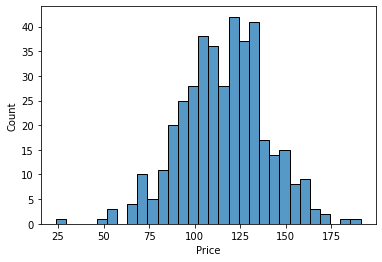

In [160]:
sns.histplot(data=cars, x='Price', bins=30)
plt.show()

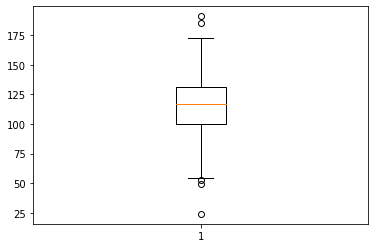

[100.  54.]
[131. 173.]


In [68]:
box = plt.boxplot(cars['Price'])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대부분의 지역에서 115달러 평균의 가격대를 형성하는 것을 알 수 있다
> * 가격차이가 있는 지역은 이유가 있을 것이다(유통과정, 특이점)

7) 추가 분석해 볼 사항이 있나요?

> * 

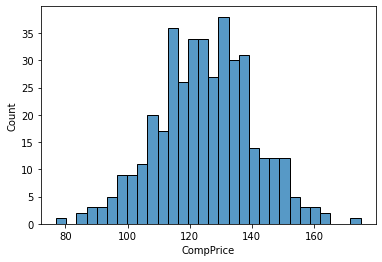

In [174]:
sns.histplot(data['CompPrice'], bins=30)
plt.show()

In [185]:
data['CompPrice'].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

In [186]:
data['Price'].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

### 5) ShelveLoc

In [72]:
cars['ShelveLoc'].describe()

count        400
unique         3
top       Medium
freq         219
Name: ShelveLoc, dtype: object

1) 변수의 비즈니스 의미

> 진열상태

2) 숫자, 범주?

In [162]:
cars['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

> 범주형

3) NaN 존재 유무

In [73]:
cars['ShelveLoc'].isna().sum()

0

4) 기초통계량(수치화)

In [80]:
cars['ShelveLoc'].describe()

count        400
unique         3
top       Medium
freq         219
Name: ShelveLoc, dtype: object

In [81]:
cars['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

5) 분포 확인(시각화)

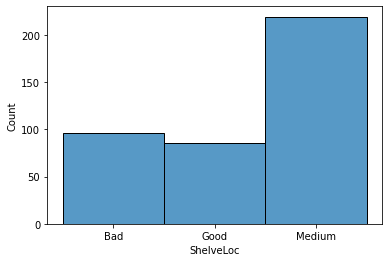

In [77]:
sns.histplot(data=cars, x='ShelveLoc')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


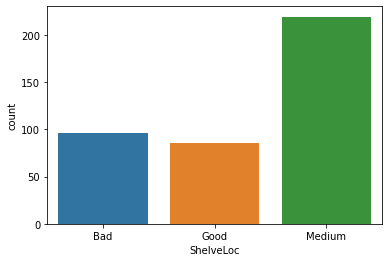

In [79]:
sns.countplot(cars['ShelveLoc'])
plt.show()

In [ ]:
# box = plt.boxplot()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * Medium    219
Bad        96
Good       85

7) 추가 분석해 볼 사항이 있나요?

> Advertising과 결합하여 진열상태별 광고예산을 분석해도 될 것 같다

### 6) [추가]Age

1) 변수의 비즈니스 의미

> 지역 인구의 평균 연령

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [82]:
cars['Age'].isna().sum()

0

4) 기초통계량(수치화)

In [83]:
cars['Age'].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

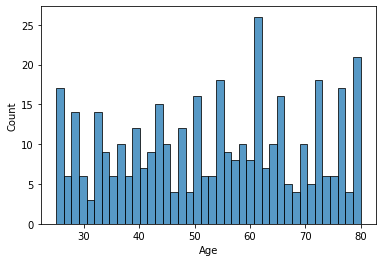

In [102]:
sns.histplot(data=cars, x='Age', bins=40)
plt.show()

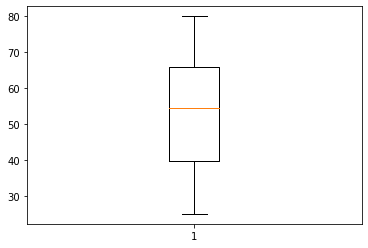

In [163]:
box = plt.boxplot(cars['Age'])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 연령대가 매우 다양하다

7) 추가 분석해 볼 사항이 있나요?

> * 

### 7) [추가]US

In [87]:
cars['US']

0      Yes
1      Yes
2      Yes
3      Yes
4       No
      ... 
395    Yes
396    Yes
397    Yes
398    Yes
399    Yes
Name: US, Length: 400, dtype: object

1) 변수의 비즈니스 의미

> 매장이 미국에 있는 지 여부(Yes, No)

2) 숫자, 범주?

> 범주

3) NaN 존재 유무

In [165]:
cars['US'].isna().sum()

0

> 결측치 존재하지 않음

4) 기초통계량(수치화)

In [166]:
cars['US'].describe()

count     400
unique      2
top       Yes
freq      258
Name: US, dtype: object

5) 분포 확인(시각화)

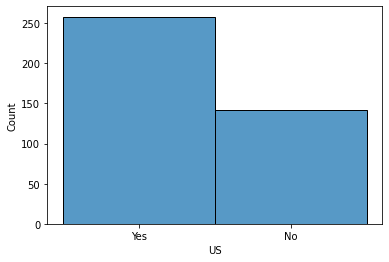

In [89]:
sns.histplot(data=cars, x='US')
plt.show()

In [90]:
cars['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 매장이 없는 지역보다 있는 지역이 더욱 더 많다

7) 추가 분석해 볼 사항이 있나요?

> * 매장의 여부에 따른 지역 판매액, 인구수 등을 함께 분석할 필요가 있다

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### 1) Advertising -> Sales

① 시각화 : scatter(regplot), jointplot

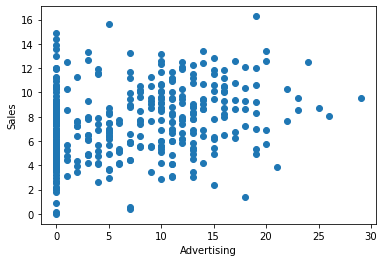

In [93]:
plt.scatter(x='Advertising', y='Sales', data=cars)
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.show()

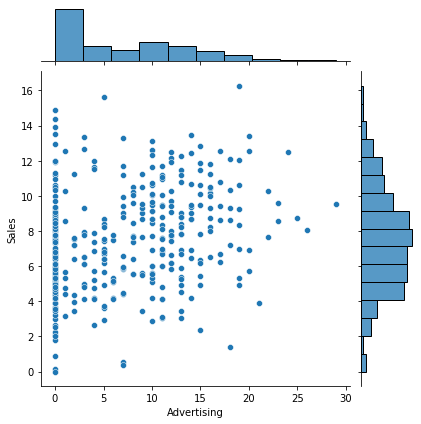

In [94]:
sns.jointplot(x='Advertising', y='Sales', data=cars)
plt.show()

② 수치화 : 상관분석

In [96]:
spst.pearsonr(cars['Advertising'], cars['Sales'])

(0.269506781376902, 4.377677110302732e-08)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> p-value 값은 0.05보다 작지만 상관계수는 0.269로 강한관계는 아님을 알 수 있다

#### 2) Population -> Sales

① 시각화 : scatter(regplot), jointplot

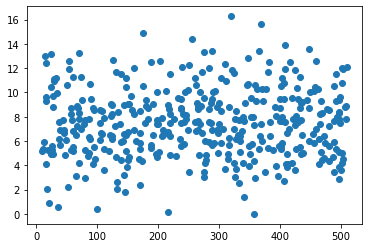

In [98]:
plt.scatter(x='Population', y='Sales', data=cars)
plt.show()

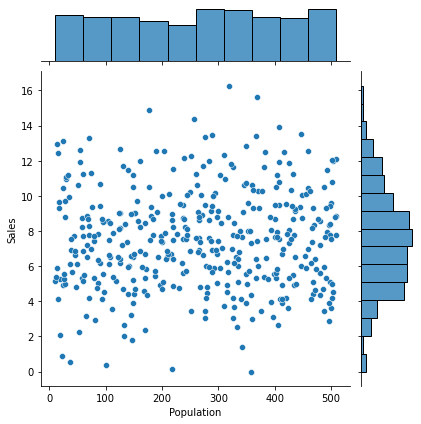

In [103]:
sns.jointplot(x='Population', y='Sales', data=cars)
plt.show()

② 수치화 : 상관분석

In [104]:
spst.pearsonr(cars['Population'], cars['Sales'])

(0.0504709844720392, 0.31398160931903)

> p-value값도 0.05를 초과하고 있고, 상관계수도 0.052를 보아 두 데이터간에 관계는거의 없음을 알 수 있다.

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

두 변수간의 관계를 파악하기 어렵다

#### 3) Price -> Sales

① 시각화 : scatter(regplot), jointplot

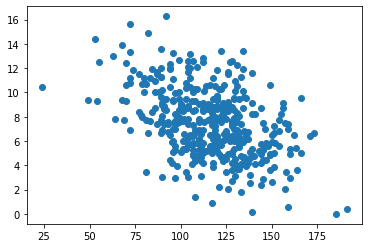

In [107]:
plt.scatter(x='Price', y='Sales', data=cars)
plt.show()

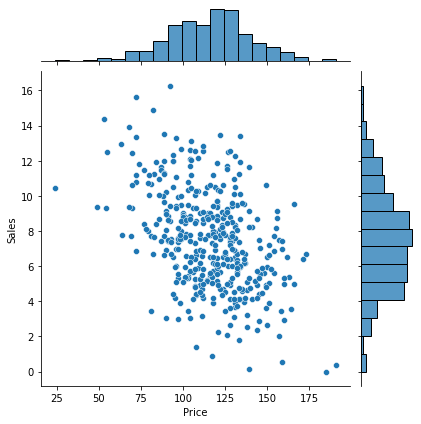

In [108]:
sns.jointplot(x='Price', y='Sales', data=cars)

② 수치화 : 상관분석

In [109]:
spst.pearsonr(cars['Price'], cars['Sales'])

(-0.4449507278465726, 7.61818701191294e-21)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> p-value의 값은 0.05보다 작은 값을 형성하고 있고, 상관계수 또한 -0.445 정도를 나타내고 있기 때문에

> 음의 상관관계를 띄는 것을 볼 수 있다

#### 4) [추가] Age -> Sales

① 시각화 : scatter(regplot), jointplot

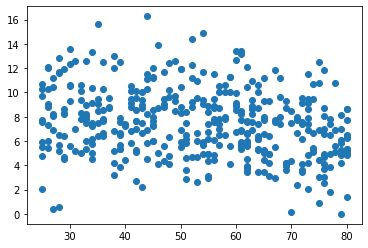

In [110]:
plt.scatter(x='Age', y='Sales', data=cars)
plt.show()

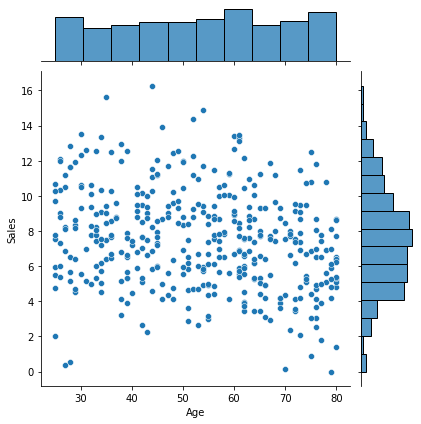

In [112]:
sns.jointplot(x='Age', y='Sales', data=cars)
plt.show()

② 수치화 : 상관분석

In [113]:
spst.pearsonr(cars['Age'], cars['Sales'])

(-0.2318154396045765, 2.7889498393711916e-06)

> p-value값이 0.05보다 작지만 상관계수는 약한 음의 상관관계를 지니고있으므로,

> 나이에 따른 각지역 판매액과의 관계는 크다고 볼 수 없다.

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### 1) ShelveLoc-> Sales

① 시각화 : 평균비교 barplot

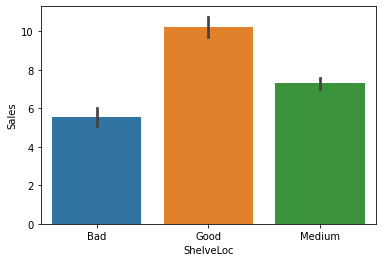

In [116]:
sns.barplot(x='ShelveLoc', y='Sales', data=cars)
plt.show()

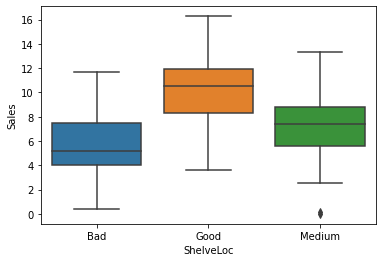

In [117]:
sns.boxplot(x='ShelveLoc', y='Sales', data=cars)
plt.show()

② 수치화 : t-test, anova

In [118]:
cars['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [190]:
p1 = cars.loc[cars['ShelveLoc'] == 'Good', 'Sales']
p2 = cars.loc[cars['ShelveLoc'] == 'Medium', 'Sales']
p3 = cars.loc[cars['ShelveLoc'] == 'Bad', 'Sales']
print(spst.f_oneway(p1, p2, p3))

F_onewayResult(statistic=92.22990509910349, pvalue=1.26693609015938e-33)


In [120]:
spst.f_oneway(p1, p2, p3)

F_onewayResult(statistic=92.22990509910349, pvalue=1.26693609015938e-33)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

> 대립가설과 연관이 있다
> p-value가 매우 낮아 과련이 있다고 볼 수 있다

#### 2) [추가]US-> Sales

① 시각화 : 평균비교 barplot

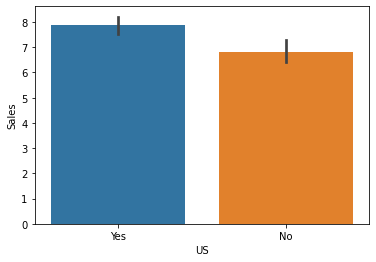

In [121]:
sns.barplot(x='US', y='Sales', data=cars)
plt.show()

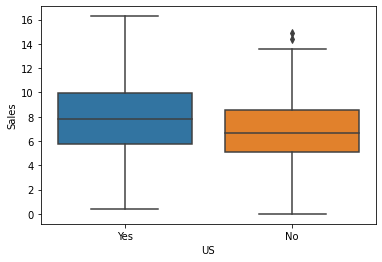

In [122]:
sns.boxplot(x='US', y='Sales', data=cars)
plt.show()

② 수치화 : t-test, anova

In [123]:
u_y = cars.loc[cars['US']=='Yes', 'Sales']
u_n = cars.loc[cars['US']=='No', 'Sales']

In [126]:
spst.ttest_ind(u_y, u_n)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## 4.관계 정리

### 1) 강한관계의 변수

> Advertising = 0.269

> Price = -0.44

> ShevLoc -> barplot 시각화를 통해

### 2) 약한관계의 변수

> Advertising = 0.269

> Price = -0.44

> Age = -0.231

> ShevLoc, US는 p-value가 0.05보다 작으므로 관계가 없다고 볼 수 없다.

### 3) 관계 없음

> Population 0.05

### 4) 추가 분석